Question #1 (1)

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as   plt
%matplotlib inline

In [100]:
dataset =pd.read_csv("C:/Users/shrey/Downloads/ML/linear_regression_test_data (1).csv")

In [101]:
matrix= dataset.as_matrix()
x=matrix[:,1]
y=matrix[:,2]
y_theoretical = matrix[:,3]

In [102]:
VarX =np.var(x)
VarY =np.var(y)
MeanCentmat=pd.DataFrame(columns=['x','y'])
MeanCentmat['x']=x
MeanCentmat['y']=y

In [103]:
CovMatrix=np.cov(MeanCentmat.T)
Val,Vect=np.linalg.eig(CovMatrix)
II = Val.argsort()[::-1]
Val = Val[II]
Vect = Vect[:, II]

In [104]:
temp=np.dot(CovMatrix,Vect)
Y=np.dot(Vect.T,temp)

C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


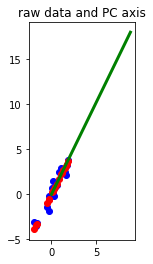

In [105]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('raw data and PC axis')
ax.scatter(x,y, color='blue')
ax.scatter(x, y_theoretical, color='red', label='theoretical')
ax.plot([0,-20*Vect[0,0]], [0,-20*Vect[1,0]],color='green', linewidth=3)
ax.set_aspect('equal', 'box')
fig.show()

Question#1(2)

In [106]:
#Linear Regression
n=20
x_bar = np.mean(x)
y_bar = np.mean(y)
S_yx = np.sum((y - y_bar) * (x - x_bar))
S_xx = np.sum((x - x_bar)**2)
beta_1_hat = S_yx / S_xx 
beta_0_hat = y_bar - beta_1_hat * x_bar
y_hat = beta_0_hat + beta_1_hat * x
r = y - y_hat
sigma_hat = np.sqrt(sum(r**2) / (n-2))

In [107]:
SS_reg = np.sum((y_hat - y_bar)**2)
SS_err = np.sum((y - y_hat)**2)
SS_total = np.sum((y - y_bar)**2)

In [108]:
R2 = SS_reg / SS_total
MS_total = SS_total / (n-1)
MS_reg = SS_reg / 1.0
MS_err = SS_err / (n-2)

C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


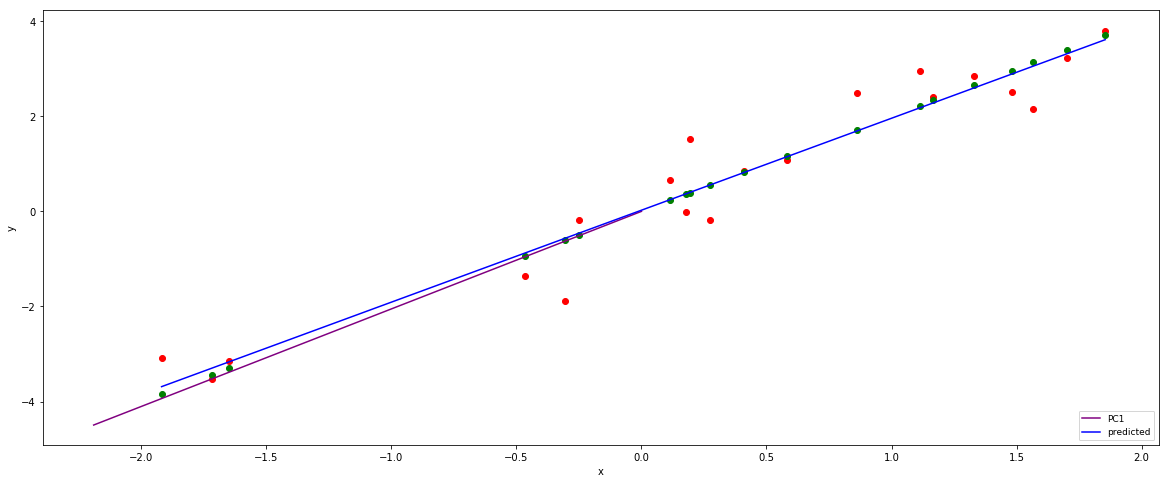

In [109]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot([0,5*Vect[0,0]], [0,5*Vect[1,0]],color='purple', label ='PC1')
ax.scatter(x, y, color='red')
ax.scatter(x, y_theoretical, color='green')
ax.plot(x, y_hat, color='blue', label='predicted')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='lower right', fontsize=9)
fig.show()


The PC1 axis and the regression line are very similar.

Question #2

In [110]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data[:,2] 
Y = diabetes.target

In [111]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.045, random_state = 0)


In [112]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train = X_train.reshape((len(X_train),1))
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
X_test = X_test.reshape((len(X_test),1))
y_pred = regressor.predict(X_test)

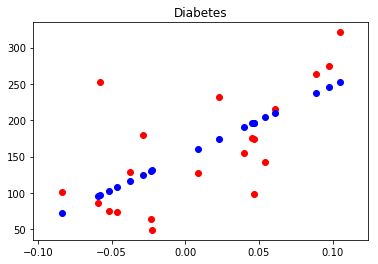

In [114]:
# Visualising the results
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test,y_pred, color = 'blue')
plt.title('Diabetes')
plt.show()
